# Introduction:
The data is related to posts published during the year of 2014 on the Facebook’s page of renowned cosmetics brand. This dataset contains 500 of the 790 rows.

Attribute information:
There are 19 attributes, it includes 7 features known prior to post publication and features for evaluating post impact.


Importing libraries necessary for importing and visualization of Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Importing warning to ignore and hide all warnings in the file for every technique.

In [2]:
import warnings
warnings.filterwarnings("ignore")

Reading the Dataset

In [3]:
data=pd.read_csv("dataset_Facebook.csv",sep=";")

In [4]:
data.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')

These are the Column(attribute) names in the dataset.

In [5]:
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


These are the first five rows of the data from this we can conclude that data contains only one categorical column i.e., Type

In [6]:
data.isnull().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

From above information we can conclude that few of the columns i.e., Paid, like share in the data contains few null values i.e., 1, 1, 4 respectively.

In [7]:
data['Paid'].unique()

array([ 0.,  1., nan])

# Data Pre-processing:
As the data contains some “NaN” values therefore I have used data.replace function to replace nan values with 0


In [8]:
data.replace(to_replace = np.nan, value = 0, inplace = True)

In [9]:
data.isnull().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   0
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

# Handling categorical(text) values

Changing the label of Categorical attribute "Type" into 0, 1, 2 and 3.

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_data = LabelEncoder()
data.iloc[:, 1] = labelencoder_data.fit_transform(data.iloc[:, 1])

In [11]:
print(labelencoder_data.classes_)

['Link' 'Photo' 'Status' 'Video']


In [12]:
data['Type'].unique()

array([1, 2, 0, 3], dtype=int64)

In [13]:
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,1,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,2,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,1,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,1,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,1,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


# Data Visualization

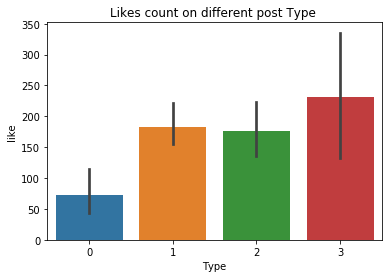

In [14]:
sns.barplot(x=data['Type'],y=data['like'])
plt.title("Likes count on different post Type ");

This is barplot between different types of post i.e., photo, status, link, etc. and the average likes on them.

From the graph we can conclude that there are only 4 types of post i.e., link, photo, status, video with the average likes around 70, 180, 170 and 230 respectively.

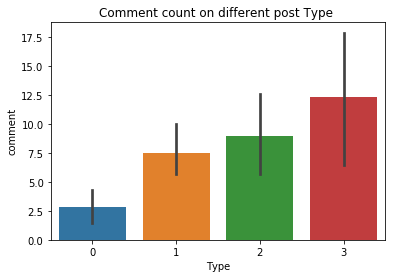

In [15]:
sns.barplot(x=data['Type'],y=data['comment'])
plt.title("Comment count on different post Type ");

This barplot is between post types and comments on them.

From this graph we/ I can conclude there are 3, 8, 9, 12 average comments on respective types of posts.

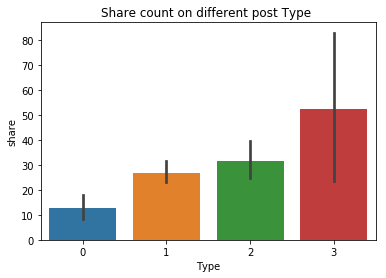

In [16]:
sns.barplot(x=data['Type'],y=data['share'])
plt.title("Share count on different post Type ");

This plot is between post type and no. of shares.

From this we/I can conclude that there is average of 13, 28, 32 and 52 shares respectively with different type of posts.



From these three graphs I can conclude that people responds to video posts more than pic and status etc. with least interested in links.

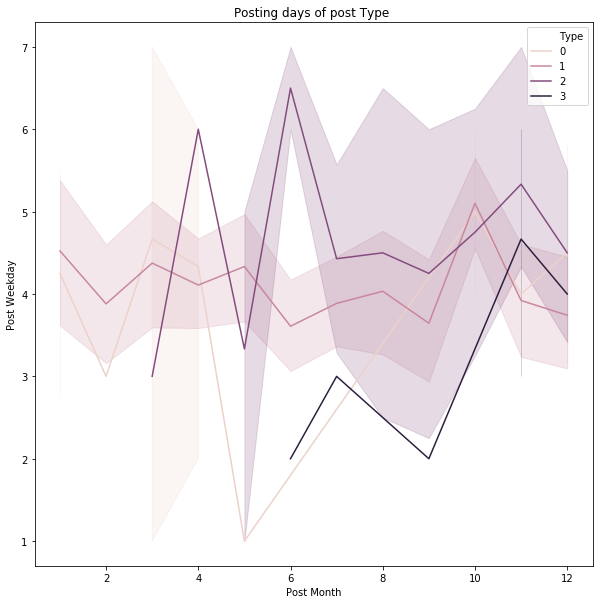

In [17]:
plt.figure(figsize=(10,10))
sns.lineplot(x=data['Post Month'],y=data['Post Weekday'],hue=data['Type'])
plt.title("Posting days of post Type ");

This is the lineplot between weekdays and months with different posts.


From this I can conclude that in the month of may people are not likely to posting things on social media because college and school session starts and they got a lot burden of work on them.
And people are more likely to post things between Thursday to Sunday as when week starts they get work load and at the end work load goes down.


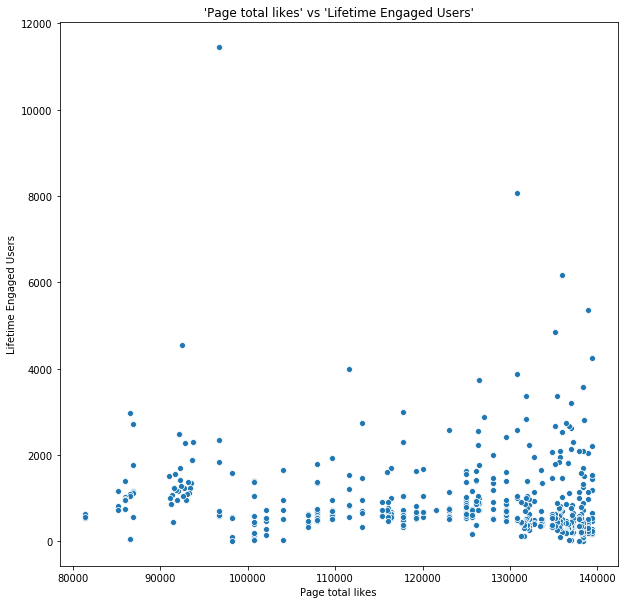

In [18]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['Page total likes'],y=data['Lifetime Engaged Users'])
plt.title(" 'Page total likes' vs 'Lifetime Engaged Users' ");

Here is the scatter plot between users lifetime posted things and total no. of likes on them i.e., the total likes on their page.

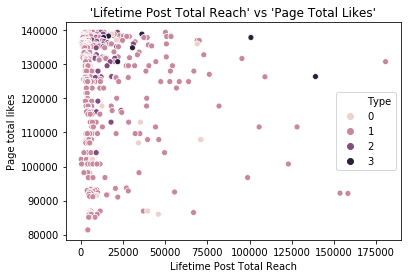

In [19]:
sns.scatterplot(x=data['Lifetime Post Total Reach'],y=data['Page total likes'],hue=data['Type'])
plt.title(" 'Lifetime Post Total Reach' vs 'Page Total Likes' ");

From this scatter plot between page total likes and lifetime post total reach I can conclude that people posts thing when they are new to fb and loses interest in later and  posts pics more than other type of posts.

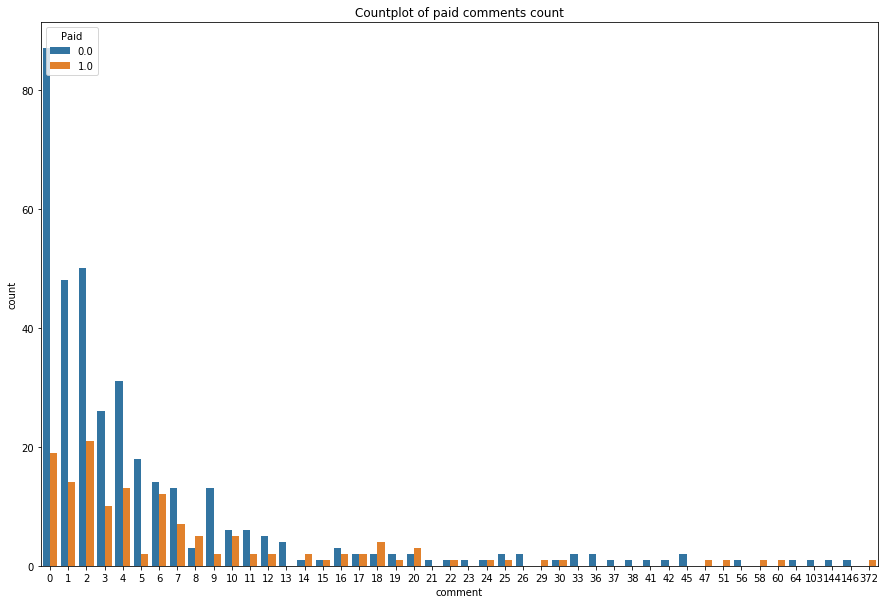

In [20]:
plt.figure(figsize=(15,10))
sns.countplot(x=data['comment'],hue=data['Paid'])
plt.title("Countplot of paid comments count");

This is the countplot of comments with paid and non-paid counts.

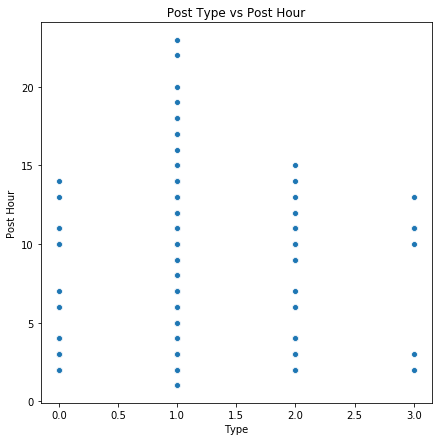

In [21]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=data['Type'],y=data['Post Hour'])
plt.title(" Post Type vs Post Hour ");

From this scatterplot between post type and posting hour I can conclude that photos are most likely to be posted any time in the day. While video are least likely.

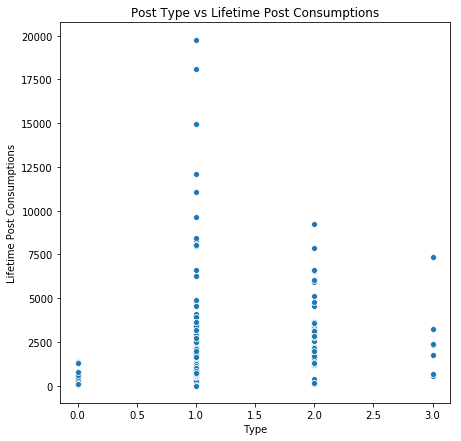

In [22]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=data['Type'],y=data['Lifetime Post Consumptions'])
plt.title("Post Type vs Lifetime Post Consumptions");

From this scatterplot between post type and there lifetime consumptions I can conclude that photos are posted much more than any other posts i.e., status, links, etc in the users lifetime and links are least likely to be posted in the lifetime of the user.

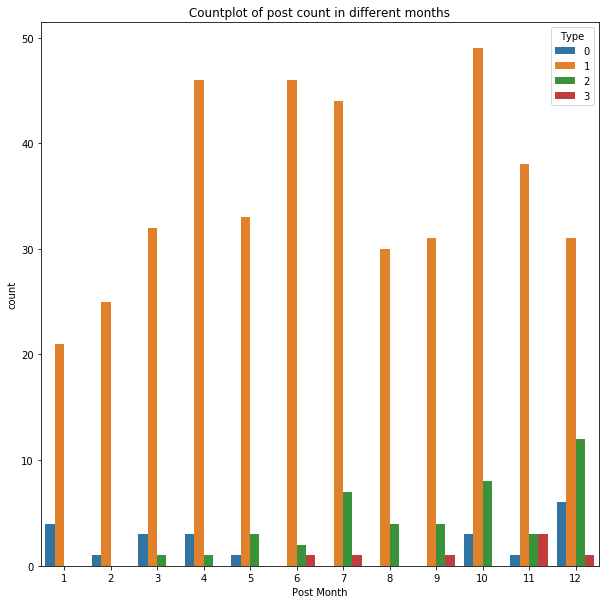

In [23]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['Post Month'],hue=data['Type'])
plt.title(" Countplot of post count in different months ");

From this countplot of post in different months I can conclude photos are too much posted in October, and photos are posted much more than any other posts whole the year.

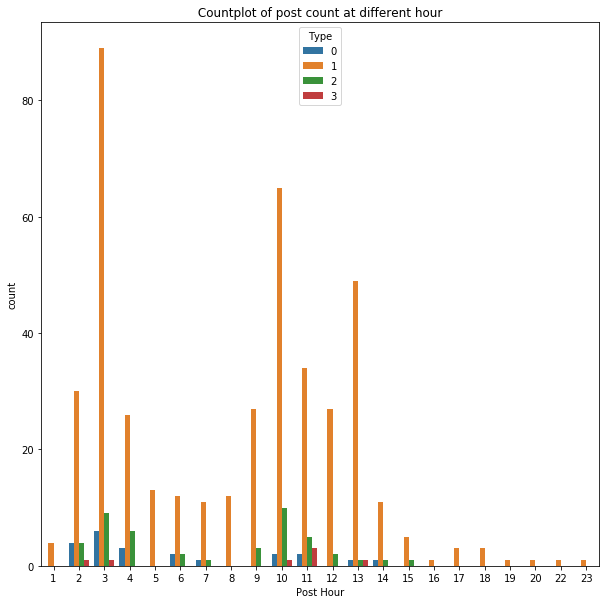

In [24]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['Post Hour'],hue=data['Type'])
plt.title(" Countplot of post count at different hour ");

From this count plot of different type of post depending on posting hour the conclusion is that pics are posted whole day but no other things are posted that much.

# CORRELATION

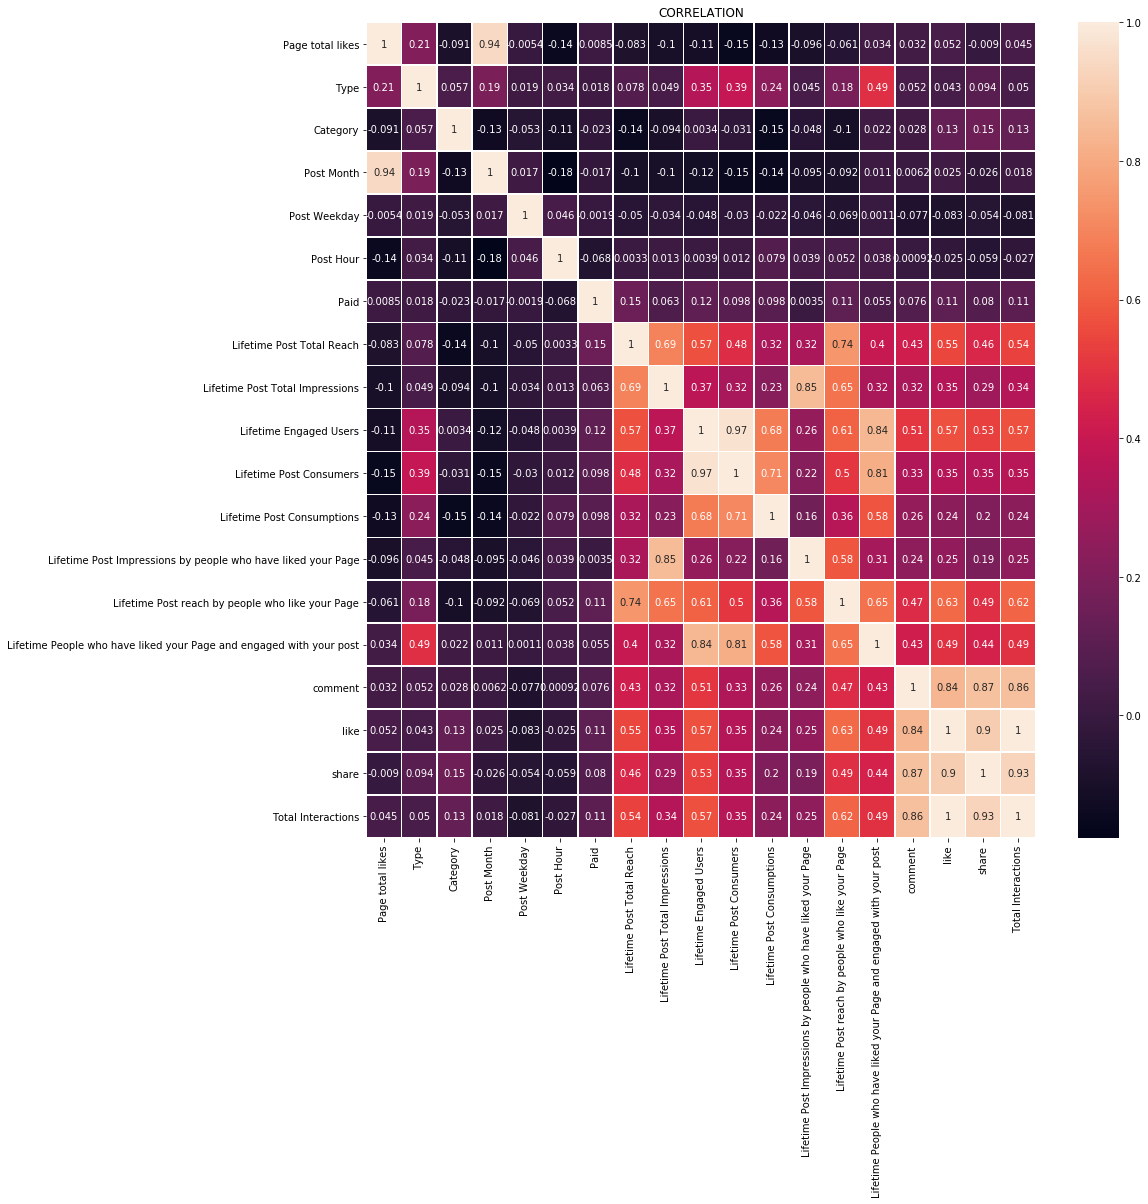

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,linecolor='white',linewidths=0.5);
plt.title("CORRELATION");

Correlation coeff ranges from -1 to 1. When it is close to 1, it means there is strong positive correlation, -1 is strong negative correlation 0 indicates no correlation.

This heatmap shows the correlation of all the columns or attributes present in the data. The highest correltaion among the variables is of 100%.


"like" and "Total Interactions" have highest correlation which is of 100%.

In [26]:
corr_matrix = data.corr()

In [27]:
corr_matrix["Lifetime Engaged Users"].sort_values(ascending=False)

Lifetime Engaged Users                                                 1.000000
Lifetime Post Consumers                                                0.968213
Lifetime People who have liked your Page and engaged with your post    0.839279
Lifetime Post Consumptions                                             0.676840
Lifetime Post reach by people who like your Page                       0.612080
Total Interactions                                                     0.572159
Lifetime Post Total Reach                                              0.570629
like                                                                   0.569922
share                                                                  0.532968
comment                                                                0.505806
Lifetime Post Total Impressions                                        0.368553
Type                                                                   0.350664
Lifetime Post Impressions by people who 

Highest correlation of Lifetime Engaged users is with Lifetime Post Consumers.

In [28]:
data.describe()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,123194.176000,1.074000,1.880000,7.038000,4.150000,7.840000,0.278000,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.590000,27.048000,212.120000
std,16272.813214,0.429993,0.852675,3.307936,2.030701,4.368589,0.448462,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.172528,42.511742,380.233118
min,81370.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.000000,10.000000,71.000000
50%,129600.000000,1.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,1.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.250000,32.000000,228.500000
max,139441.000000,3.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


# Feature Selection

Finding 10 best features using Chisquare function and k value of 10.

In [29]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data.iloc[:,0:20]
y = data.iloc[:,-1]

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Attribute','Score']
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                                            Attribute         Score
12  Lifetime Post Impressions by people who have l...  1.039932e+08
8                     Lifetime Post Total Impressions  8.041541e+07
7                           Lifetime Post Total Reach  1.224269e+07
13   Lifetime Post reach by people who like your Page  3.637057e+06
11                         Lifetime Post Consumptions  9.403286e+05
0                                    Page total likes  5.472674e+05
9                              Lifetime Engaged Users  4.175145e+05
10                            Lifetime Post Consumers  3.596203e+05
18                                 Total Interactions  3.401095e+05
16                                               like  2.933452e+05


From the above feature selection we can see that Lifetime Post Impressions by people who have liked you page has max score which is 1.039932e+08, and second best feature is Lifetime Post Total Impressions having score of 8.041541e+07.

# Model Training

# Regression Techniques

# Linear Regression

Linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables).

In [30]:
arr1=[]
X=pd.DataFrame(data.iloc[:,16])
y=pd.DataFrame(data.iloc[:,18])

Using X and y to store values. X is the independent variable and y is dependent. X contains values of column "likes" and y are the values of "total interactions".

Preprocessing is the main part of our model training. Since there wwere some null values in the data i have already replaced them with zero.

Now after preprocessing our data its time to split our data for training and testing our model. We have divided our data 70% for training and 30% for testing our trained model.

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [32]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print('Coefficients:',regressor.coef_)
print('Intercept: ',regressor.intercept_)

Coefficients: [[1.17271774]]
Intercept:  [3.25578938]


We have used linear regression for predicting our data. The main equation of Linear Regression have values Beta and Beta1 apart from X and y. And for which our beta and beta1 values come out to be 1.18 and 3.26 respectively.

In [33]:
y_pred = regressor.predict(X_test)

We used variable y_pred to store the predicted value for each value of X.

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))
print("Variance score: {}".format(r2_score(y_test, y_pred)))
arr1.append(r2_score(y_test, y_pred))

Mean squared error: 229.75654629824228
Variance score: 0.9971822302624664


Mean Squared Error and R2 score are used to calculate the accuracy of our model. The mean Squared Error for our model came out to be 229.75654629824228 and r2 score for our model came out to be 0.9971822302624664. Hence we got 99.72% accuracy for our trained model. But it is overfitting.

Text(0.5, 1.0, 'Regression Line')

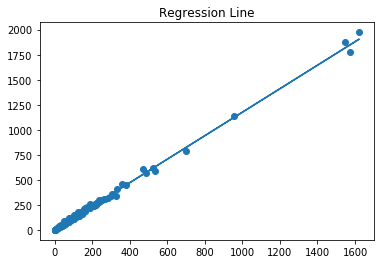

In [35]:
plt.scatter(X_test,y_test);
plt.plot(X_test,regressor.predict(X_test));
plt.title("Regression Line")

The graph showing the regression line of the best fit passing through the points of X and y. We can see that the regression line paasing through the mid of all points except 5 points which are little far from line but it is best fit line.

# Decision Tree Regressor

In [36]:
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [37]:
y_pred=regressor.predict(X_test)

In [38]:
print("Mean Square error: ",mean_squared_error(y_test,y_pred))
print("R2 score: ",r2_score(y_test,y_pred))
arr1.append(r2_score(y_test, y_pred))

Mean Square error:  1008.3197314814815
R2 score:  0.9876338112192968


In [39]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10)
print("Mean: ",scores.mean())
print("Standard Deviation: ",scores.std())

Mean:  0.9304933316782712
Standard Deviation:  0.13027291944047964


Using Decision Tree Regressor Approach I'm getting an accuracy of 98.76% which is close to accuracy of linear regression approach.

# KNN Regressor

In [40]:
from sklearn.neighbors import KNeighborsRegressor

Taking 3 k nearest Neighbours

In [41]:
reg = KNeighborsRegressor(n_neighbors=3)

In [42]:
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [43]:
y_pred=reg.predict(X_test)

In [44]:
print("Mean Squred Error: ",mean_squared_error(y_test,y_pred))
print("R2 score: ",r2_score(y_test,y_pred))
arr1.append(r2_score(y_test, y_pred))

Mean Squred Error:  1647.2748148148141
R2 score:  0.9797975674801401


Getting an accuracy of 97.98% in this approach which is greater than SVM and Random forest and less than other.

# polynomial Features

Here I'm are using polynomial features to train the model.
Polynomial features consists of degree 2 and more and hence best fits the data and here degree is 4.

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
pf=PolynomialFeatures(degree=4)
X_pf=pf.fit_transform(X)

In [46]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
lr.fit(X_pf,y)
pred=lr.predict(X_pf)

In this Approach also i have divided my data 70% for training and 30% for testing our trained model.

In [47]:
from sklearn.metrics import mean_squared_error,r2_score

rmse =np.sqrt(mean_squared_error(y,pred))
r2 = r2_score(y,pred)
print(rmse)
print(r2)
arr1.append(r2)

19.398946996127094
0.9973918900876435


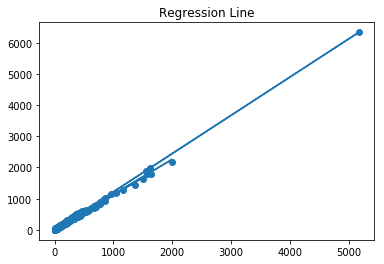

In [48]:
plt.scatter(X,y);
plt.plot(X,pred);
plt.title("Regression Line");

Getting an Accuracy of 99.74% with this approach which is greater than all other approach.

From the graph we can see that the line is curved to fit the data which is different from linear regression line.
we can conclude that in most cases polynomial gives best accuracy.

# SVM

Support Vector Machine (SVM) is a supervised machine learning algorithm capable of performing classification, regression and even outlier detection. The linear SVM classifier works by drawing a straight line between two classes. 

In [49]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="rbf")
svm_reg.fit(X_train, y_train)
y_pred = svm_reg.predict(X_test)
svm_mse = mean_squared_error(y_test, y_pred)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

588.3749503909743

In [50]:
print("R2 Score: ",r2_score(y_test,y_pred))
arr1.append(r2_score(y_test, y_pred))

R2 Score:  -0.04856313087899311


Getting the Accuracy in negative so it will be better to avoid this method.

# Random Forest Regressor

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

In [51]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ",forest_mse)
print("R2 Score: ",r2_score(y_test,y_pred))
arr1.append(r2_score(y_test, y_pred))

Mean Squared Error:  141006.07461942578
R2 Score:  0.5729054235498187


Getting an accuracy of 57.29% as accuracy is too low better not to use this approach.

In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=forest_reg, X=X_train, y=y_train, cv=10)
print("Mean: ",scores.mean())
print("Standard Deviation: ",scores.std())


Mean:  0.9848577403838912
Standard Deviation:  0.013921710643344881


Printing the accuracy table.

In [53]:
arr1_List=['Linear Regression','Decision Tree','KNN','Polynomial Features','SVM','Random Forest']
accuracy=pd.DataFrame(arr1,index=arr1_List)
accuracy.sort_values(by=0,ascending=False)

,0
Polynomial Features,0.997392
Linear Regression,0.997182
Decision Tree,0.987634
KNN,0.979798
Random Forest,0.572905
SVM,-0.048563


From the table we can conclude that polynomial will be best regression model for prediction.

# Classification Techniques


# Decision Tree

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

In [54]:
arr2=[]
A=pd.DataFrame(data.iloc[:,0]).values
b=pd.DataFrame(data.iloc[:,1]).values

For decision tree model we do not need feature selection as in decision tree optimum features are taken and hence their is no need for feature selection in this case.

In [55]:
from sklearn.model_selection import train_test_split
A_train,A_test,b_train,b_test=train_test_split(A,b,test_size=0.3)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
A_train = sc.fit_transform(A_train)
A_test = sc.transform(A_test)

Again splitting the data in training and testing our model. The percentage remains same i.e. 70% for our training and 30% for testing for trained model.

Fitting Decision Tree Classification to the Training set

In [56]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(A_train, b_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Using decision tree classifier for our model training. 

Predicting the Test set results

In [57]:
b_pred = classifier.predict(A_test)

Making the Confusion Matrix, also known as an error matrix

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(b_test, b_pred)
cm

array([[  0,   6,   0,   0],
       [  2, 125,   1,   0],
       [  0,  14,   0,   0],
       [  0,   2,   0,   0]], dtype=int64)

In [59]:
score = classifier.score(A_test, b_test)
print("Accuracy: ",score)
arr2.append(score)

Accuracy:  0.8333333333333334


Using score function for calculating the accuracy for our trained model.

With the help of decision tree classifier the accuracy comes out to be 83.33%.

# KNN

Using 5 k neighbours

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(A_train, b_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [61]:
pred = knn.predict(A_test)

In [62]:
confusion_matrix(b_test, pred)

array([[  1,   5,   0,   0],
       [  0, 125,   3,   0],
       [  1,  13,   0,   0],
       [  0,   2,   0,   0]], dtype=int64)

In [63]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(b_test, pred)
print("Accuracy: ",acc)
arr2.append(accuracy_score(b_test, pred))

Accuracy:  0.84


Getting an accuracy of 84%.

In [64]:
from sklearn.metrics import classification_report
print(classification_report(b_test, pred))

              precision    recall  f1-score   support

           0       0.50      0.17      0.25         6
           1       0.86      0.98      0.92       128
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00         2

   micro avg       0.84      0.84      0.84       150
   macro avg       0.34      0.29      0.29       150
weighted avg       0.76      0.84      0.79       150



The summary or report of the technique.

# Logistic Regression

The logistic model is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc.

In [65]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(A_train, b_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
b_pred_test = classifier.predict(A_test)

In [67]:
cm=confusion_matrix(b_test,b_pred_test)
cm

array([[  0,   6,   0,   0],
       [  0, 128,   0,   0],
       [  0,  14,   0,   0],
       [  0,   2,   0,   0]], dtype=int64)

In [68]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(b_test, b_pred_test)
print("Accuracy: ",acc)
arr2.append(accuracy_score(b_test, b_pred_test))

Accuracy:  0.8533333333333334


Getting an Accuracy of 85.33% through Logistic Regression approach.

In [69]:
from sklearn.metrics import classification_report
print(classification_report(b_test, b_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      1.00      0.92       128
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00         2

   micro avg       0.85      0.85      0.85       150
   macro avg       0.21      0.25      0.23       150
weighted avg       0.73      0.85      0.79       150



Classification report or the summary of the approach.

# SVM

In [70]:
from sklearn import svm
classifier = svm.SVC(kernel = 'rbf', C=1,gamma="auto")
classifier.fit(A_train, b_train)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [71]:
b_pred = classifier.predict(A_test)

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(b_test, b_pred)
cm

array([[  0,   6,   0,   0],
       [  0, 128,   0,   0],
       [  0,  14,   0,   0],
       [  0,   2,   0,   0]], dtype=int64)

In [73]:
summary=classification_report(b_test,b_pred)
summary

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         6\n           1       0.85      1.00      0.92       128\n           2       0.00      0.00      0.00        14\n           3       0.00      0.00      0.00         2\n\n   micro avg       0.85      0.85      0.85       150\n   macro avg       0.21      0.25      0.23       150\nweighted avg       0.73      0.85      0.79       150\n'

In [74]:
from sklearn.metrics import accuracy_score
print(accuracy_score(b_test, b_pred))
arr2.append(accuracy_score(b_test, b_pred))

0.8533333333333334


Getting the accuracy of 85.33% which is equal to logistic and greater than other approach.

# Random Forest Classifier

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
ran= RandomForestClassifier()

In [77]:
ran.fit(A_train,b_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [78]:
ran_pred=ran.predict(A_test)

In [79]:
ran_cm=confusion_matrix(b_test,ran_pred)
print(ran_cm)

[[  0   6   0   0]
 [  2 122   4   0]
 [  0  13   1   0]
 [  0   2   0   0]]


In [80]:
acc = accuracy_score(b_test, ran_pred)
print("Accuracy: ",acc)
arr2.append(accuracy_score(b_test, ran_pred))

Accuracy:  0.82


Getting an accuracy of 82% which is least than other models.

In [81]:
print(classification_report(b_test, ran_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      0.95      0.90       128
           2       0.20      0.07      0.11        14
           3       0.00      0.00      0.00         2

   micro avg       0.82      0.82      0.82       150
   macro avg       0.26      0.26      0.25       150
weighted avg       0.75      0.82      0.78       150



Classification report of the technique.

Accuracy table for all classification techniques.

In [82]:
arr2_List=['Decision Tree','KNN','Logistic Regression','SVM','Random Forest']
accuracy=pd.DataFrame(arr2,index=arr2_List)
accuracy.sort_values(by=0,ascending=False)

,0
Logistic Regression,0.853333
SVM,0.853333
KNN,0.840000
Decision Tree,0.833333
Random Forest,0.820000


From the table we can conclude thaat logistic will be best classification for prediction.

# ROC AUC Curves for classification

A useful tool when predicting the probability of a binary outcome is the Receiver Operating Characteristic curve, or ROC curve.

It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. Put another way, it plots the false alarm rate versus the hit rate.

Importing important Libraries.

In [8]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

Generating 2 datasets.

In [9]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

Splitting into train/test set equally i.e., 50%.

In [10]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

Generating prediction class.

In [11]:
ns_probs = [0 for _ in range(len(testy))]

Fitting the Model.

In [12]:
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Predicting the probabilities and keeping probabilities for the positive outcome only.

In [16]:
lr_probs = model.predict_proba(testX)
lr_probs = lr_probs[:, 1]

Calculating and Printing the Scores.

In [17]:
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


Calculating ROC Curves.

In [18]:
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)

Plotting the ROC Curve for the Model

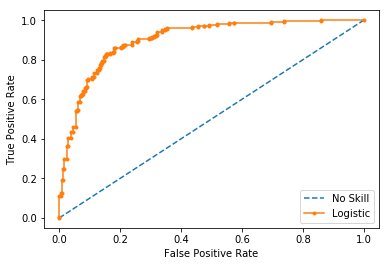

In [19]:
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()
pyplot.show()

A plot of the ROC curve for the model is also created showing that the model has skill.

# Precision Recal Curve

This is an approach in the related field of information retrieval (finding documents based on queries) measures precision and recall.

These measures are also useful in applied machine learning for evaluating binary classification models.

Precision is a ratio of the number of true positives divided by the sum of the true positives and false positives. It describes how good a model is at predicting the positive class. Precision is referred to as the positive predictive value.

Importing Libraries.

In [21]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

Generating 2 class dataset.

In [22]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

splitting data into equally train/test sets.

In [24]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

Fitting the Model.

In [25]:
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Predicting Probabilities, and Keeping probabilities for the positive outcome only.

In [27]:
lr_probs = model.predict_proba(testX)
lr_probs = lr_probs[:, 1]

Predicting class values

In [28]:
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)

Summarising the scores

In [29]:
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

Logistic: f1=0.841 auc=0.898


Plotting th precision-recall curves.

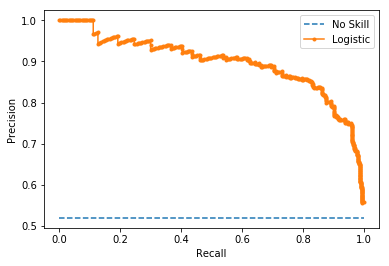

In [30]:
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')

pyplot.xlabel('Recall')
pyplot.ylabel('Precision')

pyplot.legend()
pyplot.show()

The precision-recall curve plot i have created showing the precision/recall for each threshold for a logistic regression model (orange) compared to a no skill model (blue).

As from the Previous conclusion logistic Technique gives best accuracy even with ROC-AUC or Precision-Recall curve.

# Voting Classifier

In [83]:
from sklearn.datasets import make_moons

A, b = make_moons(n_samples=500, noise=0.30, random_state=42)
A_train, A_test, b_train, b_test = train_test_split(A, b, random_state=42)

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


log = LogisticRegression(solver="liblinear", random_state=42)
rnd = RandomForestClassifier(n_estimators=10, random_state=42)
svm = SVC(gamma="auto", random_state=42)
voting = VotingClassifier(estimators=[('lr', log), ('rf', rnd), ('svc', svm)], voting='hard')


In [85]:
voting.fit(A_train, b_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', Rando...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [86]:
from sklearn.metrics import accuracy_score


for clf in (log, rnd, svm, voting):
    clf.fit(A_train, b_train)
    b_pred = clf.predict(A_test)
    print(clf.__class__.__name__, accuracy_score(b_test, b_pred))


LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


Voting classifier gives the accuracy of 89.6 which is greater than logistic, SVM and random forest.

# Hyperparameters and Fine Tuning

# K-Fold Cross Validation

In [87]:
from sklearn.model_selection import cross_val_score

In [88]:
scores = cross_val_score(estimator= KNeighborsClassifier(n_neighbors=5), X=A_train, y=b_train, cv=10)
print("Mean: ",scores.mean())
print("Standard Deviation: ",scores.std())
arr3 = []
arr3.append(scores.mean())

Mean:  0.9228228228228229
Standard Deviation:  0.027439147829580623


In [89]:
scores = cross_val_score(estimator= LogisticRegression(), X=A_train, y=b_train, cv=10)
print("Mean: ",scores.mean())
print("Standard Deviation: ",scores.std())
arr3.append(scores.mean())

Mean:  0.840169116484906
Standard Deviation:  0.043697784179415895


In [90]:
scores = cross_val_score(estimator= DecisionTreeClassifier(criterion = 'entropy'), X=A_train, y=b_train, cv=10)
print("Mean: ",scores.mean())
print("Standard Deviation: ",scores.std())
arr3.append(scores.mean())

Mean:  0.8852615773668406
Standard Deviation:  0.037532719945734504


In [91]:
scores = cross_val_score(estimator= RandomForestClassifier(), X=A_train, y=b_train, cv=10)
print("Mean: ",scores.mean())
print("Standard Deviation: ",scores.std())
arr3.append(scores.mean())

Mean:  0.8962185870080607
Standard Deviation:  0.033662875403342604


Printing the accuracy table for all cross validation technique that has been applied.

In [92]:
arr3_List=['KNN','Logistic Regression','Decision Tree','Random Forest']
accuracy=pd.DataFrame(arr3,index=arr3_List)
accuracy.sort_values(by=0,ascending=False)

,0
KNN,0.922823
Random Forest,0.896219
Decision Tree,0.885262
Logistic Regression,0.840169


From the table we can conclude that Cross validation is not able to increase the accuracy instead it decreases accuracy in some techniques like decision tree and logstic regression.

# Grid SearchCV

Grid-search is used to find the optimal hyperparameters of a model which results in the most ‘accurate’ predictions.

# SVM Grid SearchCV

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
param_grid = {'C': [0.1,1,10,100], 'gamma' : [1,0.1,0.01,0.001], 'kernel': ['rbf']}

In [95]:
grid = GridSearchCV(SVC(),param_grid, refit=True,verbose=3)
grid.fit(A_train,b_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.856, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.904, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.896, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.792, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.832, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.824, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.888, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.832, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.824, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.872, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.832, total=   0.0s


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [96]:
print(grid.best_estimator_)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [97]:
grid_predictions = grid.predict(A_test)
print(confusion_matrix(b_test,grid_predictions))
print(classification_report(b_test,grid_predictions))

[[58  3]
 [ 9 55]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        61
           1       0.95      0.86      0.90        64

   micro avg       0.90      0.90      0.90       125
   macro avg       0.91      0.91      0.90       125
weighted avg       0.91      0.90      0.90       125



In [98]:
grid_df=pd.DataFrame(grid.cv_results_)

In [99]:
grid_df[['param_C','param_kernel','mean_test_score']].sort_values(by='mean_test_score',ascending=False)

,param_C,param_kernel,mean_test_score
8,10,rbf,0.933333
4,1,rbf,0.922667
12,100,rbf,0.922667
13,100,rbf,0.909333
0,0.1,rbf,0.885333
9,10,rbf,0.864000
5,1,rbf,0.845333
14,100,rbf,0.845333
10,10,rbf,0.842667
15,100,rbf,0.842667


In [100]:
grid_pred=grid.predict(A_test)
acc = accuracy_score(b_test, grid_pred)
print("Accuracy: ",acc)
arr4=[]
arr4.append(accuracy_score(b_test, grid_pred))

Accuracy:  0.904


Getting an accuracy of 90.4% using SVM gridsearch.

# KNN Gridsearch

In [101]:
knn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid={"n_neighbors":[5,11],"metric":['euclidean','manhattan'],'weights':['uniform','distance']},cv=5,return_train_score=False)

In [102]:
knn.fit(A_train,b_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [5, 11], 'metric': ['euclidean', 'manhattan'], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=0)

In [103]:
knn_df=pd.DataFrame(knn.cv_results_)

In [104]:
knn_df[['param_n_neighbors','param_metric','param_weights','mean_test_score']].sort_values(by='mean_test_score',ascending=False)

,param_n_neighbors,param_metric,param_weights,mean_test_score
0,5,euclidean,uniform,0.922667
3,11,euclidean,distance,0.920000
4,5,manhattan,uniform,0.920000
7,11,manhattan,distance,0.917333
6,11,manhattan,uniform,0.914667
2,11,euclidean,uniform,0.912000
1,5,euclidean,distance,0.906667
5,5,manhattan,distance,0.898667


The best mean_test_score we get is 0.92 when the grids are: neighbors=5, metric=euclidean and weights=uniform.

In [105]:
knn_pred=knn.predict(A_test)
acc = accuracy_score(b_test, knn_pred)
print("Accuracy: ",acc)
arr4.append(acc)

Accuracy:  0.912


Getting an accuracy of 91.2% using KNN gridsearch.

# Random Forest Gridsearch

In [106]:
ran= GridSearchCV(estimator=RandomForestClassifier(),param_grid={"n_estimators" :[200,700],"max_features" : ['auto','sqrt','log2']},cv=5,return_train_score=False)

In [107]:
ran.fit(A_train,b_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 700], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=0)

In [108]:
ran_df=pd.DataFrame(ran.cv_results_)

In [109]:
ran_df[['param_n_estimators','param_max_features','mean_test_score']].sort_values(by='mean_test_score',ascending=False)

,param_n_estimators,param_max_features,mean_test_score
1,700,auto,0.904000
2,200,sqrt,0.904000
0,200,auto,0.901333
4,200,log2,0.901333
3,700,sqrt,0.896000
5,700,log2,0.893333


In [110]:
ran_pred=ran.predict(A_test)

In [111]:
acc = accuracy_score(b_test, ran_pred)
print("Accuracy: ",acc)
arr4.append(acc)

Accuracy:  0.888


Getting an accuracy of 88.8% using random forest gridsearch approach.

In [112]:
arr4_List=['SVM','KNN','Random Forest']
accuracy=pd.DataFrame(arr4,index=arr4_List)
accuracy.sort_values(by=0,ascending=False)

,0
KNN,0.912
SVM,0.904
Random Forest,0.888


From these gridsearch approach we can conclude KNN gridsearch will be best fitted for hypertuning the Model.

# Conclusion

We can conclude that Polynomial regression is best suited for our regression model based on this dataset.
KNN also is a good regression technique for future prediction.


In case of our classifier models logistic, SVM, KNN, and Decision tree performs very well. 
All these models have accuracy arround 90% whereas random forest gives an accuracy near about 82%.

Thankyou.